<a href="https://colab.research.google.com/github/KolpakovaMaria/ComputerVision1/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%962.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving мячи.png to мячи (1).png


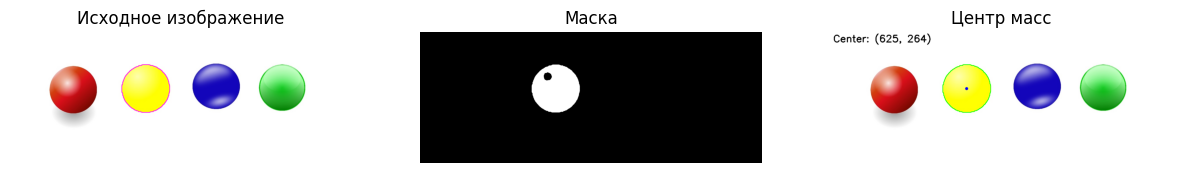

In [27]:
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import numpy as np

uploaded = files.upload()  # "Выбрать файл"
image_path = next(iter(uploaded))

frame = cv2.imread(image_path)  # считывание кадра

# Преобразуем в HSV
frame_HSV = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Задаём пороги
low_yellow = np.array([20, 110, 110])
high_yellow = np.array([40, 255, 255])

mask = cv2.inRange(frame_HSV, low_yellow, high_yellow)

# Отрисовка контуров
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(frame, contours, -1, (255, 0, 255), 2)

# Создаем копию изображения для отображения
output_frame = frame.copy()

# Проходим по всем найденным контурам
for contour in contours:
    # Находим моменты контура
    M = cv2.moments(contour)

    if M["m00"] != 0:  # Проверяем, чтобы избежать деления на ноль
        # Вычисляем координаты центра масс
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # Рисуем контур и центр масс на изображении
        cv2.drawContours(output_frame, [contour], -1, (0, 255, 0), 2)  # Рисуем контур
        cv2.circle(output_frame, (cX, cY), 7, (255, 0, 0), -1)  # Рисуем центр масс

# Добавляем текст с координатами центра масс в левом верхнем углу
text = f"Center: ({cX}, {cY})"
cv2.putText(output_frame, text, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 3)

# Отображение изображений
plt.figure(figsize=(15, 5))  # размер в дм

plt.subplot(1, 3, 1)
plt.title("Исходное изображение")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Маска")
plt.imshow(mask, cmap='gray')  # Используем cmap='gray' для отображения маски
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Центр масс")
plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()
